In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
import numpy as np 
import pandas as pd 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Prediction of New Hospitalization Number Before Period Vacin**


In [ ]:
# create a new data frame with only 'count_new_hosp column' of no vacin effect new hospitalization number
# The last date we could analyze new hospitalization number without effect vacin is 10/01/2021 (2 weeks after the begining of vacin injection
# note:first vacin injection 27/12/2020
# load dataset
# dataset contains new hospitalization number from March 2020 (beginning of hospital registration for covid cases) to 26/12/2020 (vacin injection from 27/12/2020)
df_withoutVacin = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProjectWP2/wp2dataLSTM_withoutvacin.csv')
df_withoutVacin['date'] = pd.to_datetime(df_withoutVacin['date'])
df_withoutVacin.set_index('date',inplace=True)

print(df_withoutVacin.shape)
print(df_withoutVacin)

(298, 2)
           date  count_new_hosp
0    2020-03-19            2229
1    2020-03-20            1256
2    2020-03-21            1540
3    2020-03-22            1534
4    2020-03-23            2053
..          ...             ...
293  2021-01-06            1433
294  2021-01-07            1438
295  2021-01-08            1439
296  2021-01-09             941
297  2021-01-10             728

[298 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            298 non-null    object
 1   count_new_hosp  298 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.8+ KB


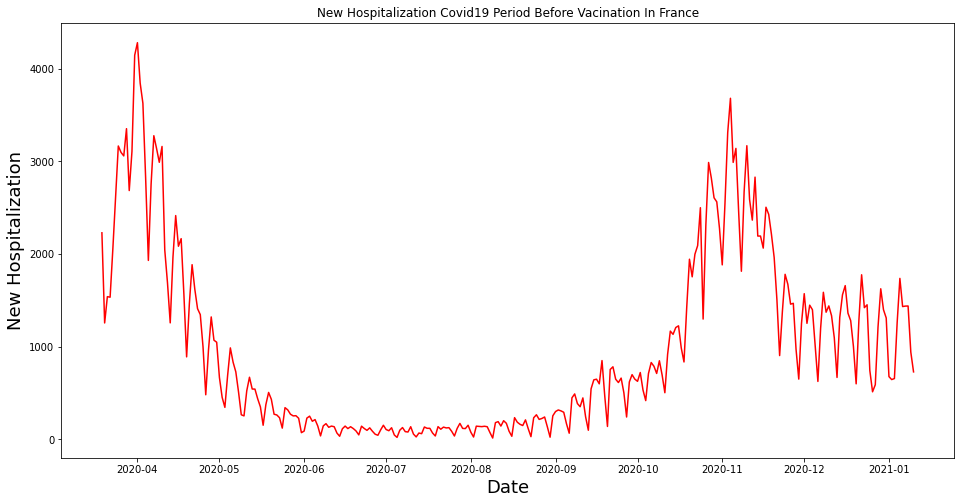

In [ ]:
#plotting the data
plt.figure(figsize=(16,8))
plt.title('New Hospitalization Covid19 Period Before Vacination In France')
plt.plot(df_withoutVacin['count_new_hosp'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('New Hospitalization', fontsize = 18)
plt.show()

In [ ]:
data_withoutVacin = df_withoutVacin.filter(['count_new_hosp'])
dataset_withoutVacin = data_withoutVacin.values
#train test split 0.8
training_data_withoutVacin_len = math.ceil(len(dataset_withoutVacin)*.8)  # number of rows to train the model on
training_data_withoutVacin_len

239

In [ ]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_withoutVacin = scaler.fit_transform(dataset_withoutVacin)

In [ ]:
#create the training dataset
#create the scaled training dataset
train_data_withoutVacin = scaled_data_withoutVacin[0:training_data_withoutVacin_len, :]
#Split the data into x_train, y_train datasets
x_train_withoutVacin = []
y_train_withoutVacin = []
for i in range(1,len(train_data_withoutVacin)):
    x_train_withoutVacin.append(train_data_withoutVacin[i-1:i, 0])
    y_train_withoutVacin.append(train_data_withoutVacin[i,0])
    if i<=1:
        print(x_train_withoutVacin)
        print(y_train_withoutVacin)
        print()

[array([0.51910007])]
[0.2910710100773377]



In [ ]:
#convert the x_train and y_train  to numppy array
x_train_withoutVacin,y_train_withoutVacin = np.array(x_train_withoutVacin), np.array(y_train_withoutVacin)
#reshape the data
x_train_withoutVacin = np.reshape(x_train_withoutVacin,(x_train_withoutVacin.shape[0],x_train_withoutVacin.shape[1],1))
x_train_withoutVacin.shape

(238, 1, 1)

In [ ]:
#Buil the LSTM model
model =Sequential()
model.add(LSTM(40,return_sequences=True, input_shape=(x_train_withoutVacin.shape[1],1)))
model.add(LSTM(40,return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

#Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train_withoutVacin,y_train_withoutVacin, batch_size=1, epochs=100)

Epoch 1/100
238/238 [==============================] - 3s 2ms/step - loss: 0.0649
Epoch 2/100
238/238 [==============================] - 1s 2ms/step - loss: 0.0056
Epoch 3/100
238/238 [==============================] - 1s 2ms/step - loss: 0.0072
Epoch 4/100
238/238 [==============================] - 1s 2ms/step - loss: 0.0060
Epoch 5/100
238/238 [==============================] - 1s 2ms/step - loss: 0.0052
Epoch 6/100
238/238 [==============================] - 1s 2ms/step - loss: 0.0071
Epoch 7/100
238/238 [==============================] - 1s 2ms/step - loss: 0.0075
Epoch 8/100
238/238 [==============================] - 1s 2ms/step - loss: 0.0064
Epoch 9/100
238/238 [==============================] - 1s 2ms/step - loss: 0.0059
Epoch 10/100
238/238 [==============================] - 1s 2ms/step - loss: 0.0067
Epoch 11/100
238/238 [==============================] - 1s 2ms/step - loss: 0.0047
Epoch 12/100
238/238 [==============================] - 1s 2ms/step - loss: 0.0052
Epoch 13/100


In [ ]:
#create the testing data sets
test_data_withoutVacin= scaled_data_withoutVacin[training_data_withoutVacin_len-1:, :]
#create the data sets x_test and y_test
x_test_withoutVacin = []
y_test_withoutVacin = dataset_withoutVacin[training_data_withoutVacin_len:,:]
for i in range(1,len(test_data_withoutVacin)):
    x_test_withoutVacin.append(test_data_withoutVacin[i-1:i,0])

#convert the data to a numpy array
x_test_withoutVacin = np.array(x_test_withoutVacin)

#reshape the data
x_test_withoutVacin = np.reshape(x_test_withoutVacin, (x_test_withoutVacin.shape[0], x_test_withoutVacin.shape[1],1))
x_test_withoutVacin.shape

#predicting the data
predictions_withoutVacin = model.predict(x_test_withoutVacin)
predictions_withoutVacin = scaler.inverse_transform(predictions_withoutVacin)

#get the root mean square error(RMSE)
rmse = np.sqrt(np.mean(predictions_withoutVacin - y_test_withoutVacin)**2)
rmse

88.74299181922008

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'upper_center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


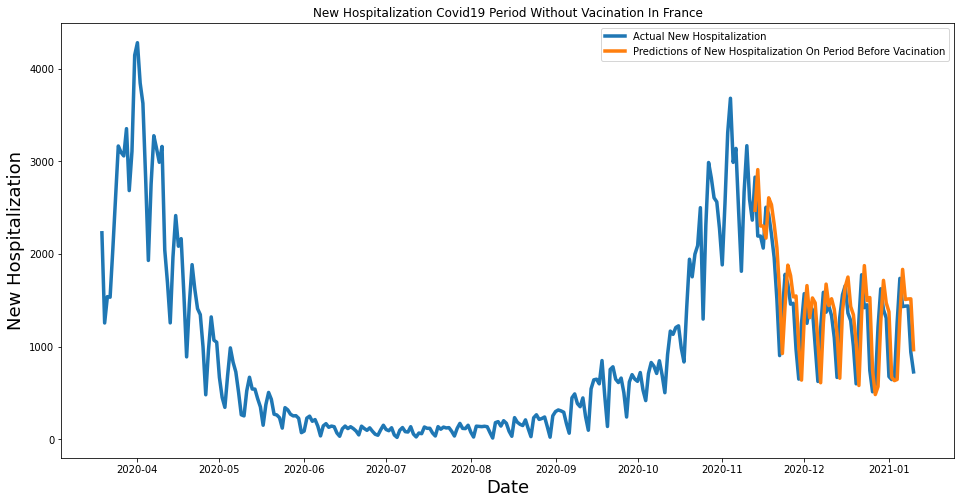

In [ ]:
#plot the data
train_withoutVacin = data_withoutVacin[:training_data_withoutVacin_len]
valid_withoutVacin = data_withoutVacin[training_data_withoutVacin_len:]
valid_withoutVacin['Predictions_withoutVacin'] = predictions_withoutVacin
#Visialization the data
plt.figure(figsize=(16,8))
plt.title('New Hospitalization Covid19 Period Without Vacination In France')
plt.xlabel('Date', fontsize=18)
plt.ylabel('New Hospitalization' ,fontsize=18)
plt.plot(df_withoutVacin['count_new_hosp'],linewidth=3.5)
plt.plot(valid_withoutVacin[['Predictions_withoutVacin']],linewidth=3.5)
plt.legend(['Actual New Hospitalization','Predictions of New Hospitalization On Period Before Vacination'], loc='upper_center')

In [ ]:
#show the valid and predicted price
#valid_withoutVacin

## **Prediction of New Hospitalization Number On Period Vacin**

In [ ]:
# create a new data frame with only 'count_new_hosp column' of vacin effect new hospitalization number
# The first date we could analyze new hospitalization number without effect vacin is 10/01/2021 (2 weeks after the begining of vacin injection
# note:first vacin injection 27/12/2020
# load dataset
# dataset contains new hospitalization number from March 2020 (beginning of hospital registration for covid cases) to 26/12/2020 (vacin injection from 27/12/2020)
df_withVacin = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProjectWP2/wp2dataLSTM_withvacin.csv')
# view dataset
df_withVacin['date'] = pd.to_datetime(df_withVacin['date'])
df_withVacin.set_index('date',inplace=True)

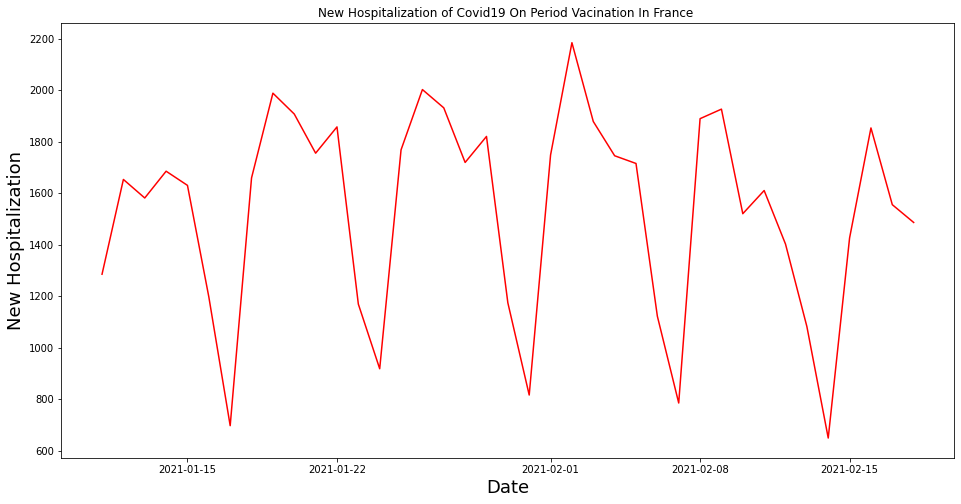

In [ ]:
#plotting the data
plt.figure(figsize=(16,8))
plt.title('New Hospitalization of Covid19 On Period Vacination In France ')
plt.plot(df_withVacin['count_new_hosp'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('New Hospitalization', fontsize = 18)
plt.show()

In [ ]:
data_withVacin= df_withVacin.filter(['count_new_hosp'])
dataset_withVacin = df_withVacin.values
#train test split 0.8
training_data_withVacin_len = math.ceil(len(dataset_withVacin)*.8)  # number of rows to train the model on
training_data_withVacin_len
print(training_data_withVacin_len)

32


In [ ]:
#scale the data
scaler_withVacin = MinMaxScaler(feature_range=(0,1))
scaled_data_withVacin = scaler.fit_transform(dataset_withVacin)

In [ ]:
#create the training dataset
#create the scaled training dataset
train_data_withVacin = scaled_data_withVacin[0:training_data_withVacin_len, :]
#Split the data into x_train_withVacin, y_train_withVacin, datasets_withVacin
x_train_withVacin = []
y_train_withVacin = []
for i in range(5,len(train_data_withVacin)):
    x_train_withVacin.append(train_data_withVacin[i-5:i, 0])
    y_train_withVacin.append(train_data_withVacin[i,0])
    if i<=5:
        print(x_train_withVacin)
        print(y_train_withVacin)
        print()

[array([0.41433225, 0.65407166, 0.60716612, 0.67491857, 0.63908795])]
[0.3570032573289902]



In [ ]:
#convert the x_train and y_train to numppy array
x_train_withVacin,y_train_withVacin = np.array(x_train_withVacin), np.array(y_train_withVacin)
#reshape the data
x_train_withVacin = np.reshape(x_train_withVacin,(x_train_withVacin.shape[0],x_train_withVacin.shape[1],1))
x_train_withVacin.shape

(27, 5, 1)

In [ ]:
#Buil the LSTM model
model =Sequential()
model.add(LSTM(100,activation="relu",return_sequences=True, input_shape=(x_train_withVacin.shape[1],1)))
model.add(LSTM(100,activation="relu", return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

#Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train_withVacin,y_train_withVacin, batch_size=1, epochs=100)

Epoch 1/100
27/27 [==============================] - 2s 5ms/step - loss: 0.3563
Epoch 2/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0716
Epoch 3/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0935
Epoch 4/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0807
Epoch 5/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0784
Epoch 6/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0982
Epoch 7/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0835
Epoch 8/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0820
Epoch 9/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0695
Epoch 10/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0583
Epoch 11/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0353
Epoch 12/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0425
Epoch 13/100
27/27 [=================

In [ ]:
#create the testing data sets
test_data_withVacin= scaled_data_withVacin[training_data_withVacin_len-5:, :]
#create the data sets x_test and y_test
x_test_withVacin = []
y_test_withVacin = dataset_withVacin[training_data_withVacin_len:,:]
for i in range(5,len(test_data_withVacin)):
    x_test_withVacin.append(test_data_withVacin[i-5:i,0])
print(len(y_test_withVacin))

#convert the data to a numpy array
x_test_withVacin = np.array(x_test_withVacin)
#reshape the data
x_test_withVacin = np.reshape(x_test_withVacin, (x_test_withVacin.shape[0], x_test_withVacin.shape[1],1))
x_test_withVacin.shape

#predicting the data
predictions_withVacin = model.predict(x_test_withVacin)
predictions_withVacin = scaler.inverse_transform(predictions_withVacin)

#get the root mean square error(RMSE)
rmse = np.sqrt(np.mean(predictions_withVacin - y_test_withVacin)**2)
rmse

7


276.16123744419644

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'upper_center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


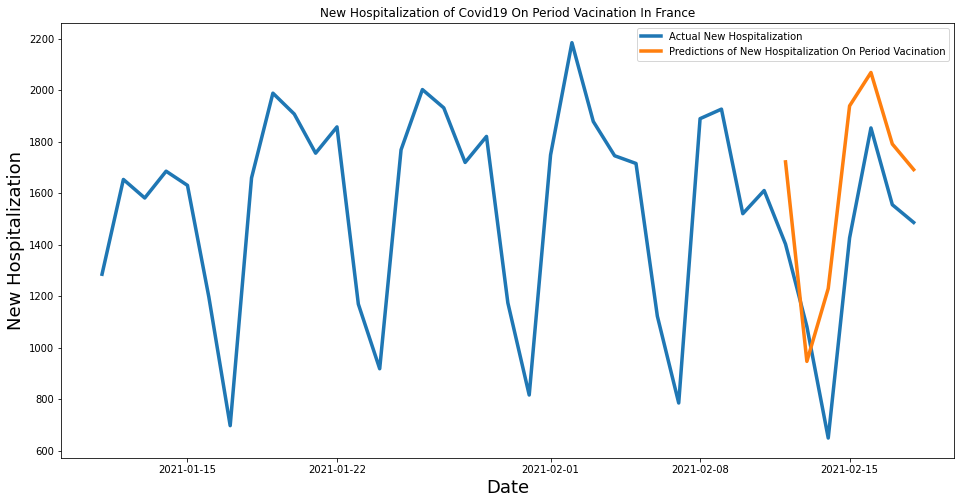

In [ ]:
#plot the data
train_withVacin = data_withVacin[:training_data_withVacin_len]
valid_withVacin = data_withVacin[training_data_withVacin_len:]
valid_withVacin['Predictions_withVacin'] = predictions_withVacin
#Visialization the data
plt.figure(figsize=(16,8))
plt.title('New Hospitalization of Covid19 On Period Vacination In France')
plt.xlabel('Date', fontsize=18)
plt.ylabel('New Hospitalization' ,fontsize=18)
plt.plot(df_withVacin['count_new_hosp'],linewidth=3.5)
plt.plot(valid_withVacin[['Predictions_withVacin']],linewidth=3.5)
plt.legend(['Actual New Hospitalization','Predictions of New Hospitalization On Period Vacination'], loc='upper_center')

## **Combination of Period Before Vacin and on Vacin**

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProjectWP2/wp2-may-null.csv')
df3['date'] = pd.to_datetime(df3['date'])
df3.set_index('date',inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'upper_center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


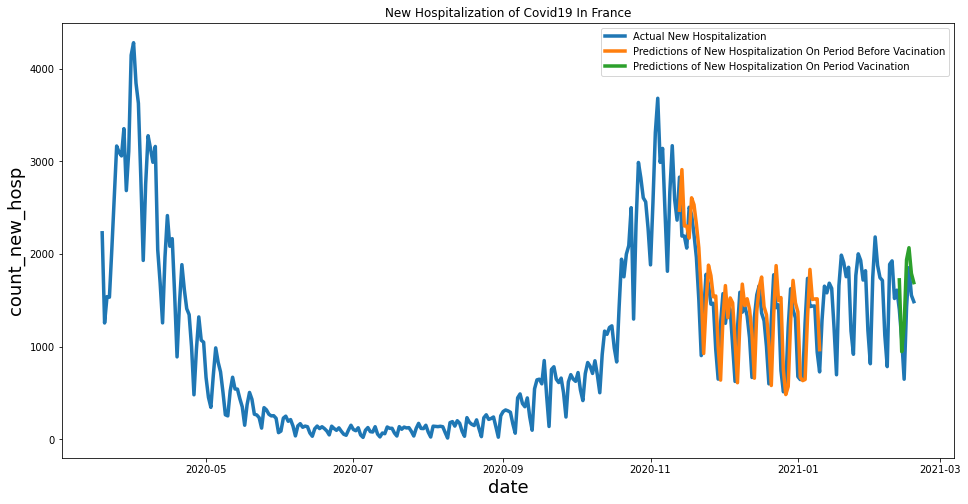

In [ ]:
#Visialization the data
plt.figure(figsize=(16,8))
plt.title('New Hospitalization of Covid19 In France')
plt.xlabel('date', fontsize=18)
plt.ylabel('count_new_hosp' ,fontsize=18)
plt.plot(df3['count_new_hosp'],linewidth=3.5)
plt.plot(valid_withoutVacin[['Predictions_withoutVacin']],linewidth=3.5)
plt.plot(valid_withVacin[['Predictions_withVacin']],linewidth=3.5)
plt.legend(['Actual New Hospitalization','Predictions of New Hospitalization On Period Before Vacination','Predictions of New Hospitalization On Period Vacination'], loc='upper_center')
